***Load Google drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Import library***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import SCORERS, mean_absolute_error

import math

***Data Information***

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Classroom/Project/Project-1/housePrice.csv',header=0) # آپلود داده

In [ ]:
df.head() # بررسی 5 ردیف اول داده ها

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [ ]:
df.shape # تعداد سطرها و ستون ها

(3479, 8)

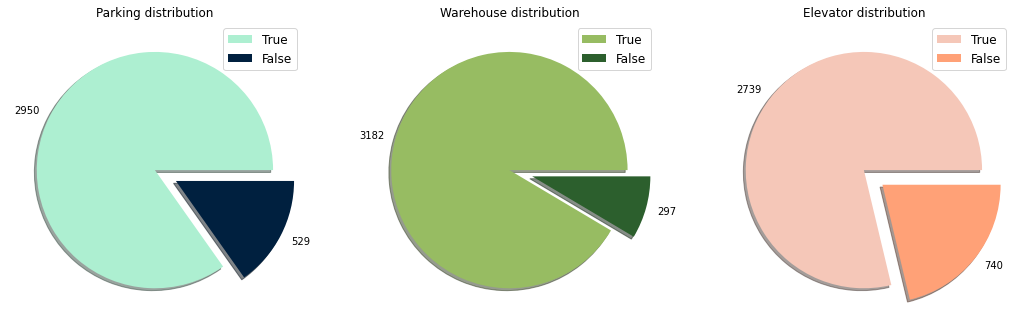

In [ ]:
# نمایش نمودار دایره ای ستون های پارک، انباری و آسانسور(نمایش بر اساس تعداد)
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

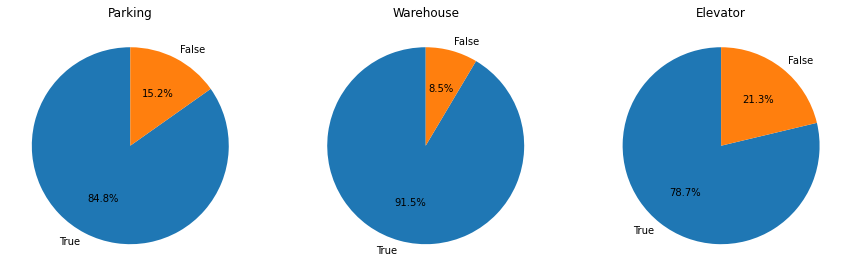

In [ ]:
# نمایش نمودار دایره ای ستون های پارک، انباری و آسانسور(نمایش بر اساس درصد)
Parking = df['Parking'].value_counts()

Warehouse = df['Warehouse'].value_counts()

Elevator = df['Elevator'].value_counts()
fig1, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,15)) 

labels = 'True', 'False'
ax1.pie([Parking[1], Parking[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.set_title("Parking")

labels = 'True', 'False'
ax2.pie([Warehouse[1], Warehouse[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.set_title("Warehouse")

labels = 'True', 'False'
ax3.pie([Elevator[1], Elevator[0]], labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.set_title("Elevator")

plt.show()

In [ ]:
df.describe() # آمار توصیفی

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [ ]:
df.info() # خلاصه ای از اطلاعات داده

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [ ]:
# بیشترین تعداد خانه در این پنج منطقه تهران است
df['Address'].value_counts().nlargest(5)

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Name: Address, dtype: int64

In [ ]:
# پنج منطقه تهران با بالاترین میانگین قیمت مسکن (تومان)
df.groupby('Address').mean()['Price'].nlargest(5).reset_index()

,Address,Price
0,Gandhi,7.000000e+10
1,Lavasan,4.800000e+10
2,Mahmoudieh,3.346667e+10
3,Vanak,3.270000e+10
4,Elahieh,2.678635e+10


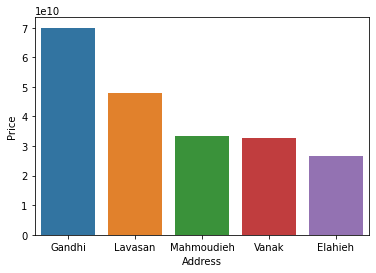

In [ ]:
# نمودار پنج منطقه تهران با بالاترین میانگین قیمت مسکن (تومان)
addressLPIR = df.groupby('Address').mean()['Price'].nlargest(5).reset_index()
sns.barplot(x="Address",
           y="Price",
           data=addressLPIR)

In [ ]:
# پنج منطقه تهران با بالاترین میانگین قیمت مسکن (دلار)
df.groupby('Address').mean()['Price(USD)'].nlargest(5).reset_index() #USD

,Address,Price(USD)
0,Gandhi,2.333333e+06
1,Lavasan,1.600000e+06
2,Mahmoudieh,1.115556e+06
3,Vanak,1.090000e+06
4,Elahieh,8.928784e+05


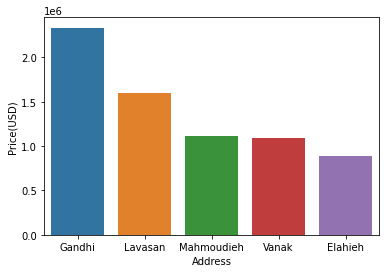

In [ ]:
# پنج منطقه تهران با بالاترین میانگین قیمت مسکن (دلار)
addressLP = df.groupby('Address').mean()['Price(USD)'].nlargest(5).reset_index()
sns.barplot(x="Address",
           y="Price(USD)",
           data=addressLP)

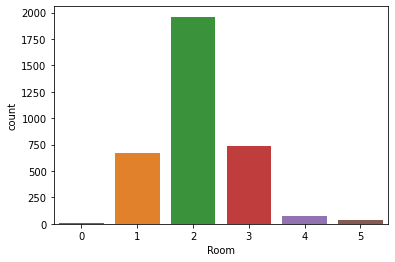

In [ ]:
sns.countplot(x="Room",data=df) # تعداد اتاق خواب

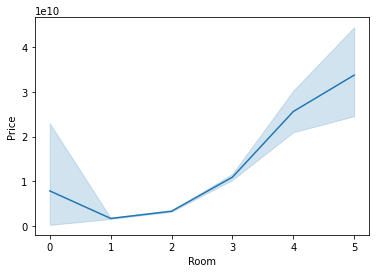

In [ ]:
sns.lineplot(data = df, x = 'Room', y ='Price' ) # رابطه بین تعداد اتاق ها و قیمت

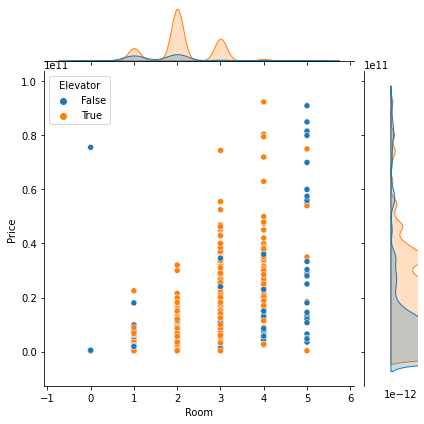

In [ ]:
sns.jointplot(data=df,x='Room', y='Price', hue='Elevator')
# طبق نمودار پایین اکثر خانه های دارای 5 اتاق بدون آسانسور هستند

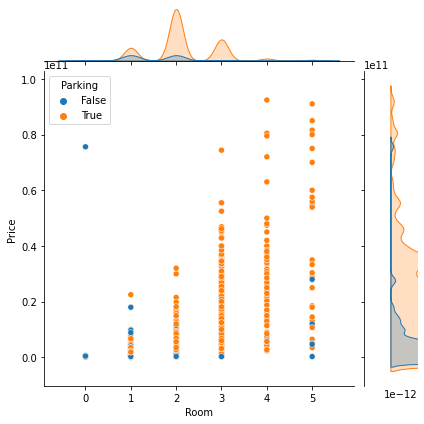

In [ ]:
sns.jointplot(data=df,x='Room', y='Price', hue='Parking') 
# اکثر خانه هایی که اتاق دارند پارکینگ هم دارند

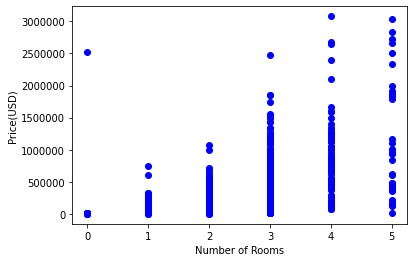

In [ ]:
# نمودار تعداد اتاقها نسبت به قیمت به دلار
plt.scatter(df['Room'], df['Price(USD)'],  color='blue')
plt.xlabel("Number of Rooms")
plt.ylabel("Price(USD)")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [ ]:
# به نظر می رسد که خانه های گران تر اتاق های بیشتری دارند که منطقی است. اما یک خانه بسیار گران قیمت وجود دارد که اتاق خواب ندارد،
df[(df['Room']== 0) & (df['Price(USD)']> 2000000)]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3107,630,0,False,False,False,Tajrish,7.560000e+10,2520000.0


 این یک خانه بزرگ در بالای شهر است، بنابراین برای من منطقی است که گران است، اما چیز عجیب این است که یک مکان به این بزرگی نه اتاق خواب دارد و نه حتی انباری!! من فکر می کنم این یک چیز دور از ذهن است. بیایید خانه های دیگر را در همان آدرس بررسی کنیم

In [ ]:
df[df['Address']== 'Tajrish']

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
355,110,2,True,True,True,Tajrish,6.600000e+09,220000.00
1148,115,2,True,True,True,Tajrish,8.200000e+09,273333.33
2584,300,4,True,True,True,Tajrish,9.000000e+09,300000.00
2769,100,2,True,True,True,Tajrish,5.700000e+09,190000.00
2831,100,2,True,True,True,Tajrish,5.700000e+09,190000.00
3096,150,3,True,True,True,Tajrish,1.275000e+10,425000.00
3107,630,0,False,False,False,Tajrish,7.560000e+10,2520000.00


**Data Preprocessing**

In [ ]:
df.dtypes.to_frame() # بررسی نوع داده ها

,0
Area,object
Room,int64
Parking,bool
Warehouse,bool
Elevator,bool
Address,object
Price,float64
Price(USD),float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [ ]:
# حذف قیمت به تومان
df.drop("Price", inplace=True, axis = 1)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,True,True,True,Shahran,61666.67
1,60,1,True,True,True,Shahran,61666.67
2,79,2,True,True,True,Pardis,18333.33
3,95,2,True,True,True,Shahrake Qods,30083.33
4,123,2,True,True,True,Shahrake Gharb,233333.33


In [ ]:
# جایگزین کردن داده های خالی به کلمه نامعلوم 
df = df.fillna("Unknown")
missing_data = df.isnull().sum()
print(missing_data)

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price(USD)    0
dtype: int64


In [ ]:
#تبدیل فرمت
df.Parking = df.Parking.astype(int)
df.Warehouse = df.Warehouse.astype(int)
df.Elevator = df.Elevator.astype(int)
df.Area = df.Area.str.replace(',' , '').astype(int)

In [ ]:
df.nlargest(5,'Area') # پنج تا خانه با بیشترین مساحت

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
709,16160000000,3,1,1,1,Pasdaran,538666.67
1604,8400000000,2,1,1,1,Gheitarieh,290000.00
570,3310000000,2,1,1,1,Ostad Moein,110333.33
2802,2550000000,2,1,1,1,Central Janatabad,85000.00
2171,3600,2,0,0,0,Shahryar,324000.00


In [ ]:
#sns.jointplot(x='Area', y='Price(USD)', data=df)

In [ ]:
df.drop( df[df['Area'] >= 2000000].index , inplace=True) # حذف خانه هایی با مساحت بیشتر از 2 میلیون
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3475 non-null   int64  
 1   Room        3475 non-null   int64  
 2   Parking     3475 non-null   int64  
 3   Warehouse   3475 non-null   int64  
 4   Elevator    3475 non-null   int64  
 5   Address     3475 non-null   object 
 6   Price(USD)  3475 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 217.2+ KB


In [ ]:
df.isnull().values.any() # آیا داده خالی وجود دارد؟ 

False

In [ ]:
df.isnull().sum() # تعداد داده های خالی هر ستون

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price(USD)    0
dtype: int64

In [ ]:
# دسته بندی آدرس با میانگین قیمت به دلار
Address_df = df.groupby('Address').mean()['Price(USD)'].reset_index()
# مرتب سازی بر اساس قیمت به دلار
Address_df = Address_df.sort_values(by=['Price(USD)']).reset_index()
## اضافه کردن یک ستون (کد آدرس)
Address_df.insert(0, 'codedAddress', range(1, 194))
df1 = pd.Series(Address_df.codedAddress.values,index=Address_df.Address).to_dict()
df["Code_Adress"] = df["Address"].map(df1)

In [ ]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD),Code_Adress
0,63,1,1,1,1,Shahran,61666.67,100
1,60,1,1,1,1,Shahran,61666.67,100
2,79,2,1,1,1,Pardis,18333.33,16
3,95,2,1,1,1,Shahrake Qods,30083.33,27
4,123,2,1,1,1,Shahrake Gharb,233333.33,176


In [ ]:
df2=df["Price(USD)"]/df["Area"] # تقسیم قیمت خانه بر مساحت خانه
# دسته بندی مساحت با میانگین قیمت به دلار
MS = df.groupby('Area').mean()['Price(USD)'].reset_index()
# مرتب سازی بر اساس قیمت به دلار
MS = MS.sort_values(by=['Price(USD)']).reset_index()
## اضافه کردن یک ستون (متر دلار)
df.insert(1, "Metr_Usd",df2)

In [ ]:
df.head()

,Area,Metr_Usd,Room,Parking,Warehouse,Elevator,Address,Price(USD),Code_Adress
0,63,978.836032,1,1,1,1,Shahran,61666.67,100
1,60,1027.777833,1,1,1,1,Shahran,61666.67,100
2,79,232.067468,2,1,1,1,Pardis,18333.33,16
3,95,316.666632,2,1,1,1,Shahrake Qods,30083.33,27
4,123,1897.018943,2,1,1,1,Shahrake Gharb,233333.33,176


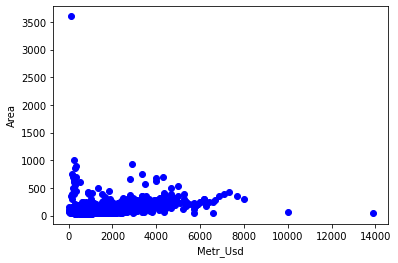

In [ ]:
# نمودار قیمت هر متر به مساحت خانه
plt.scatter(df['Metr_Usd'], df['Area'],  color='blue')
plt.xlabel("Metr_Usd")
plt.ylabel("Area")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [ ]:
df.nlargest(5,'Metr_Usd') # پنج تا از بالاترین قیمت هر متر خانه

,Area,Metr_Usd,Room,Parking,Warehouse,Elevator,Address,Price(USD),Code_Adress
3394,54,13888.888889,1,1,1,1,West Ferdows Boulevard,750000.00,106
3132,60,10000.000000,1,0,0,0,Shahr-e-Ziba,600000.00,105
2394,310,8000.000000,3,1,1,1,Aqdasieh,2480000.00,180
1332,350,7666.666657,4,1,1,1,Niavaran,2683333.33,184
1707,420,7333.333333,4,1,1,1,Zaferanieh,3080000.00,187


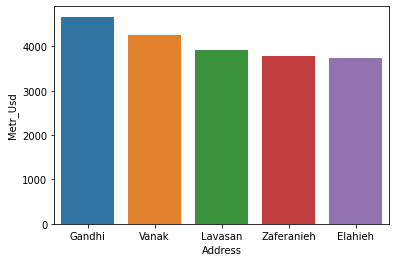

In [ ]:
# نمودار پنج منطقه با بالاترین میانگین قیمت هر متر خانه 
addressLP = df.groupby('Address').mean()['Metr_Usd'].nlargest(5).reset_index()
sns.barplot(x="Address",
           y="Metr_Usd",
           data=addressLP)

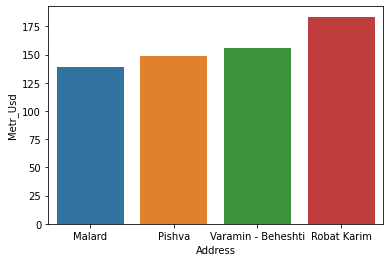

In [ ]:
# نمودار پنج منطقه با پایین ترین میانگین قیمت هر متر خانه
addressLP = df.groupby('Address').mean()['Metr_Usd'].nsmallest(4).reset_index()
sns.barplot(x="Address",
           y="Metr_Usd",
           data=addressLP)

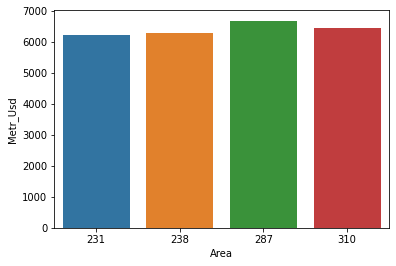

In [ ]:
# نمودار 5 مساحت خانه با بالاترین میانگین فیمت هر متر   
addressLP = df.groupby('Area').mean()['Metr_Usd'].nlargest(4).reset_index()
sns.barplot(x="Area",
           y="Metr_Usd",
           data=addressLP)

In [ ]:
df[df['Area'] == 287] # یک خانه با مساحت 287 متر با 5 اتاق خواب و بدون آسانسور

,Area,Metr_Usd,Room,Parking,Warehouse,Elevator,Address,Price(USD),Code_Adress
1635,287,6678.28108,5,1,1,0,Vanak,1916666.67,190


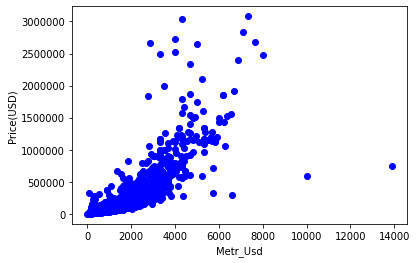

In [ ]:
# نمودار قیمت خانه(دلار) بر قیمت هر متر 
plt.scatter(df['Metr_Usd'], df['Price(USD)'],  color='blue')
plt.xlabel("Metr_Usd")
plt.ylabel("Price(USD)")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

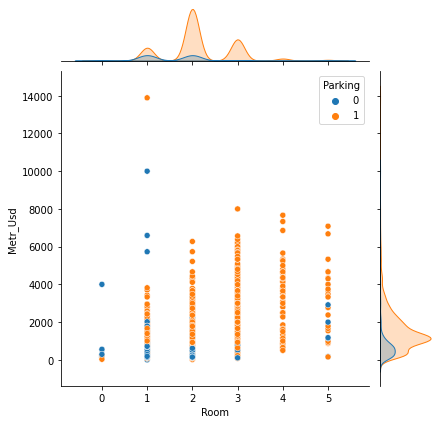

In [ ]:
# اکثر خانه هایی با 5 اتاق،پارکینگ دارند و همه شون قیمت هر متر آن ها زیر 8 هزار دلار است 
sns.jointplot(data=df,x='Room', y='Metr_Usd', hue='Parking') 

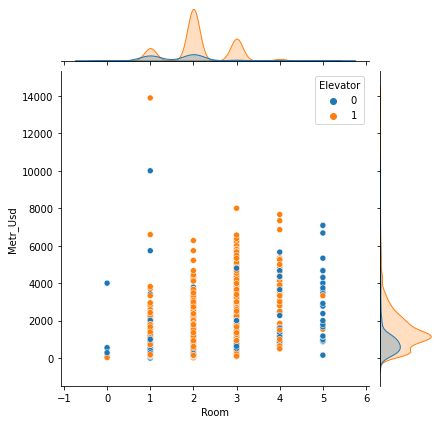

In [ ]:
# اکثر خانه هایی با 5 اتاق،آسانسور دارند و همه شون قیمت هر متر آن ها زیر 8 هزار دلار است 
sns.jointplot(data=df,x='Room', y='Metr_Usd', hue='Elevator') 

In [ ]:
 df.drop("Price(USD)", axis = 1) # حذف قیمت به دلار

,Area,Metr_Usd,Room,Parking,Warehouse,Elevator,Address,Code_Adress
0,63,978.836032,1,1,1,1,Shahran,100
1,60,1027.777833,1,1,1,1,Shahran,100
2,79,232.067468,2,1,1,1,Pardis,16
3,95,316.666632,2,1,1,1,Shahrake Qods,27
4,123,1897.018943,2,1,1,1,Shahrake Gharb,176
...,...,...,...,...,...,...,...,...
3474,86,1356.589186,2,1,1,1,Southern Janatabad,108
3475,83,2730.923735,2,1,1,1,Niavaran,184
3476,75,162.222267,2,0,0,0,Parand,6
3477,105,1777.777810,2,1,1,1,Dorous,183


<Figure size 576x360 with 0 Axes>

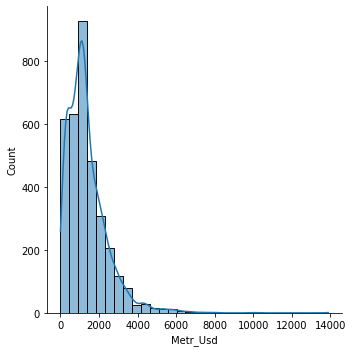

In [ ]:
# آمار تعداد قیمت هر متر خونه
plt.figure(figsize=(8,5))
sns.displot(df['Metr_Usd'] , bins=30 , kde=True )

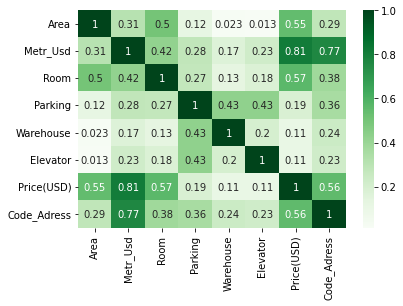

In [ ]:
# ماتریس همبستگی
sns.heatmap(df.corr(), annot=True,cmap='Greens')

In [ ]:
X = df.drop(['Price(USD)', 'Address'],axis=1) # حذف قیمت  خانه و آدرس
y = df['Price(USD)'] # ریختن قیمت (دلار) در متغییر وای

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # تعیین درصد آموزش و تست

In [ ]:
X_train.shape , X_test.shape # تعداد داده آموزش و تست

((2432, 7), (1043, 7))

In [ ]:
model= LinearRegression() # ساخت مدل
model.fit(X_train , y_train ) # آموزش مدل

LinearRegression()

In [ ]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient']) # ضریب رگرسیون

,Coeficient
Area,643.458841
Metr_Usd,208.168074
Room,71264.023908
Parking,-26890.942011
Warehouse,14452.689070
Elevator,-40754.933796
Code_Adress,-896.713826


In [ ]:
y_pred=model.predict(X_test) # دادن ورودی تست
MAE= metrics.mean_absolute_error(y_test, y_pred) # میانگین قدرمطلق خطا
MSE= metrics.mean_squared_error(y_test, y_pred) # میانگین مربعات خطا
RMSE=np.sqrt(MSE) # جذر میانگین مربعات خطا

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.304663e+04
MSE,1.079383e+10
RMSE,1.038933e+05


In [ ]:
test_residuals=y_test-y_pred # (تفاضل جواب صحیح داده تست و جواب پیشبینی شده) مقدار باقیمانده 

Text(0, 0.5, 'Y-Pred$')

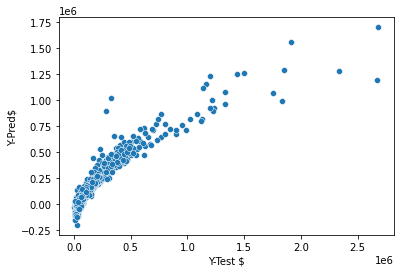

In [ ]:
# نمودار جواب صحیح داده تست و جواب پیشبینی شده 
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test $')
plt.ylabel('Y-Pred$')

Text(0, 0.5, 'residuals$')

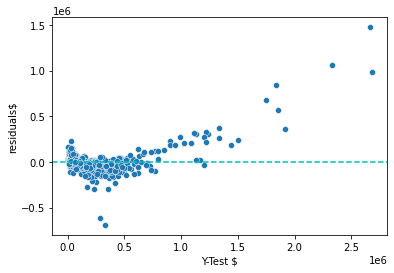

In [ ]:
# نمودار جواب صحیح داده تست و مقدار باقیمانده  
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='c', ls='--')
plt.xlabel('Y-Test $')
plt.ylabel('residuals$')

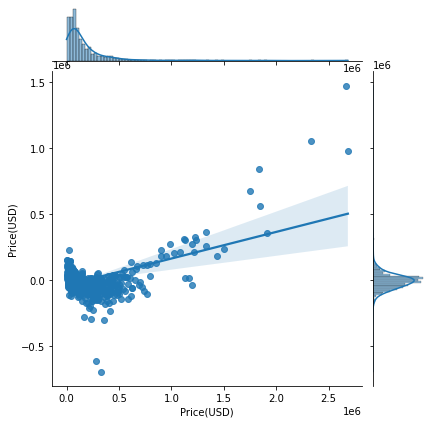

In [ ]:
# نمودار جواب صحیح داده تست و مقدار باقیمانده  
sns.jointplot (x=y_test,y=test_residuals,data=df,kind='reg')

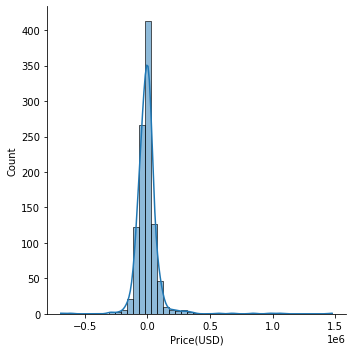

In [ ]:
sns.displot(test_residuals, bins=45,kde=True) # نمودار مقدار باقی مانده 

In [ ]:
r2_score(y_test,y_pred) # درصد جواب درست پیشبینی

0.836114902281064

In [ ]:
y_train_p=model.predict(X_train) # درصد درست جواب پیشبینی بر اساس داده آموزش دیده
r2_score(y_train,y_train_p)

0.7790323018128126